# MaxSpeedup

In [1]:
# Standard packages
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections  as mc
import statistics

# Local packages
from simulate import *

In [51]:
#double dispatch
experiments = ['Jun-29-5', 'Jun-29-6', 'Jun-30-0', 'Jun-30-1', 'Jun-30-2']

norm = []
for directory in experiments:
    with open(f'/net/netscratch/plavin3/experiment-results/{directory}/SimStats.pkl', 'rb') as file:
        norm.append(pickle.load(file))

In [100]:
# double dispatch
mfexperiments = ['Jun-30-3', 'Jun-30-4', 'Jun-30-5', 'Jun-30-6', 'Jun-30-7']

mf = []
for directory in mfexperiments:
    with open(f'/net/netscratch/plavin3/experiment-results/{directory}/SimStats.pkl', 'rb') as file:
        mf.append(pickle.load(file))

In [114]:
def get_time_ariel(df):
    clocks = df.profile[0]['ClockStats']
    ariel_time = list(clocks[clocks['Name']=='ariel.ariel'][' handler time (s)'])[0]
    bus_time = list(clocks[clocks['Name']=='memHierarchy.Bus'][' handler time (s)'])[0]
    cache_time = list(clocks[clocks['Name']=='memHierarchy.Cache'][' handler time (s)'])[0]
    memcontroller_time = list(clocks[clocks['Name']=='memHierarchy.MemController'][' handler time (s)'])[0]
    parrot_time = list(clocks[clocks['Name']=='memHierarchy.Parrot'][' handler time (s)'])[0]
    
    #print(ariel_time, bus_time, cache_time, memcontroller_time, parrot_time)
    return (ariel_time, bus_time + cache_time + memcontroller_time, parrot_time)

    
def fun1(df):
    
    new_df = pd.DataFrame(columns = ['benchmark', 'time(ariel)', 'time(memH)', 'time(Parrot)', 'MPS', 'A-MPS'])
    for bench in sorted(df.keys()):
        gta = get_time_ariel(df[bench])
        max_potential_speedup = (gta[0]+gta[1]) / gta[0]
        adjusted_mps = (gta[0]+gta[1]) / (gta[0]+gta[2])
        new_df = new_df.append({'benchmark':bench, 
                       'time(ariel)':gta[0],
                       'time(memH)':gta[1],
                       'time(Parrot)':gta[2],
                       'MPS': max_potential_speedup,
                       'A-MPS': adjusted_mps}, ignore_index=True)
    
    average = list(new_df.mean())
    new_df = new_df.append({'benchmark':'mean', 
                       'time(ariel)':average[0],
                       'time(memH)':average[1],
                       'time(Parrot)':average[2],
                       'MPS': average[3],
                       'A-MPS': average[4]}, ignore_index=True)

    return(new_df)



aggregate = fun1(norm[0].st)
print(aggregate.to_latex(float_format="%.2f", index=False))
print('--------------')
# Drop a few columns for now
dropped = aggregate[['benchmark', 'time(ariel)', 'time(memH)', 'MPS']]
print(dropped.to_latex(float_format="%.2f", index=False))

\begin{tabular}{lrrrrr}
\toprule
      benchmark &  time(ariel) &  time(memH) &  time(Parrot) &  MPS &  A-MPS \\
\midrule
            2mm &      2418.17 &     4007.74 &        465.62 & 2.66 &   2.23 \\
            3mm &      2125.32 &     3604.09 &        417.44 & 2.70 &   2.25 \\
            adi &      1489.42 &     2260.56 &        275.69 & 2.52 &   2.12 \\
           atax &        71.03 &      109.22 &         13.80 & 2.54 &   2.12 \\
           bicg &        69.43 &      100.47 &         13.11 & 2.45 &   2.06 \\
       cholesky &      1296.58 &     1742.86 &        236.74 & 2.34 &   1.98 \\
    correlation &      1877.55 &     3278.77 &        334.69 & 2.75 &   2.33 \\
     covariance &      1852.30 &     3196.09 &        325.89 & 2.73 &   2.32 \\
        deriche &       800.28 &     1182.60 &        142.24 & 2.48 &   2.10 \\
        doitgen &      1944.98 &     2904.72 &        355.72 & 2.49 &   2.11 \\
         durbin &        34.00 &       58.04 &          7.05 & 2.71 &   2.24 \

In [109]:
aggregate = fun1(mf[1].st)
print(aggregate)
# Drop a few columns for now
#dropped = aggregate[['benchmark', 'time(ariel)', 'time(memH)', 'MPS']]
#print(dropped.to_latex(float_format="%.2f", index=False))

((aggregate['time(ariel)'] + aggregate['time(memH)'] + aggregate['time(Parrot)'])/(aggregate['time(ariel)'] + aggregate['time(memH)'])).mean()

         benchmark  time(ariel)   time(memH)  time(Parrot)       MPS     A-MPS
0              2mm  1959.236524  1154.738138    399.340353  1.589382  1.320277
1              3mm  2142.804014  3424.887911    455.824806  2.598321  2.142550
2              adi  1471.288464  2163.722926    299.075997  2.470631  2.053256
3             atax    80.104645   116.180745     16.852090  2.450362  2.024464
4             bicg    72.841157   100.988606     15.316239  2.386422  1.971811
5         cholesky  1247.195742  1724.424299    269.481822  2.382641  1.959296
6      correlation  1419.860170   210.373217    237.676742  1.148165  0.983528
7       covariance  1419.719232   250.572016    237.298197  1.176494  1.008011
8          deriche   775.540047  1168.601397    177.256356  2.506823  2.040458
9          doitgen  1519.102260   253.331000    263.266329  1.166764  0.994426
10          durbin    38.165963    57.931460      9.444699  2.517883  2.018401
11         fdtd-2d  1645.812052  2184.580451    327.

1.108288569765201

In [112]:
np.(aggregate['MPS'])

2.0415391858142415

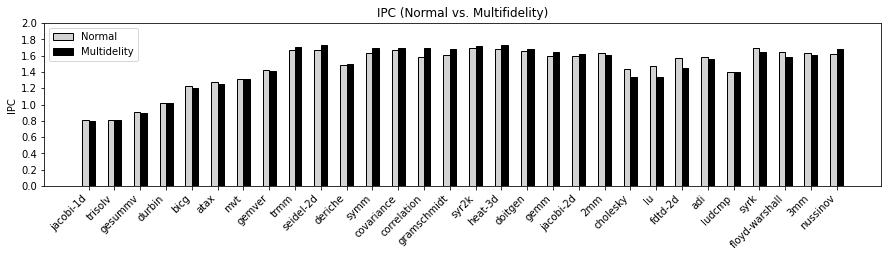

In [9]:
x = np.arange(len(names))
width = 0.25
fig, ax = plt.subplots()
ax.bar(x-width/2, y_norm_ipc, width, color='lightgrey', label='Normal', edgecolor='black')
ax.bar(x+width/2, y_mf_ipc, width, color='black', label='Multidelity', edgecolor='black')
#ax.bar(x+width, y_mfn_ipc, width, color='lightblue', label='Multidelity New', edgecolor='black')

ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45, ha='right')
ax.set_ylim((0,2))
ax.set_ylabel('IPC', rotation=90)
ax.set_title('IPC (Normal vs. Multifidelity)')
ax.autoscale()
plt.legend()

#ax.yaxis.set_label_coords(-.07, 0.96)
nyticks = 11
ax.set_yticks([(2/(nyticks-1))*x for x in np.arange(nyticks)])
fig.set_size_inches((15,3))
fig.savefig('plots/ipc-normal-vs-mf.png')
#plt.tight_layout()

In [10]:
pct_err = []

def p_err(approx, exact):
    return (approx-exact)/exact * 100
def mape(arr):
    return np.mean(np.absolute(arr))

print('Percent error\n')
name_len = max([len(name) for name in names])
for (i, name) in enumerate(names):
    pe = p_err(y_mf_ipc[i], y_norm_ipc[i])
    pct_err.append(pe)
    print(f'{i}'.ljust(2), f'{name}'.ljust(name_len), f'{pe: 06.2f}%')
    
print(f'\nMAPE: {mape(pct_err):.2f}%')

Percent error

0  jacobi-1d      -02.00%
1  trisolv         00.39%
2  gesummv        -01.03%
3  durbin          00.08%
4  bicg           -02.34%
5  atax           -01.53%
6  mvt             00.31%
7  gemver         -01.20%
8  trmm            02.46%
9  seidel-2d       03.12%
10 deriche         00.34%
11 symm            04.07%
12 covariance      01.50%
13 correlation     06.51%
14 gramschmidt     05.03%
15 syr2k           00.93%
16 heat-3d         03.17%
17 doitgen         01.23%
18 gemm            02.70%
19 jacobi-2d       01.27%
20 2mm            -01.46%
21 cholesky       -06.05%
22 lu             -08.84%
23 fdtd-2d        -08.01%
24 adi            -01.80%
25 ludcmp          00.41%
26 syrk           -02.58%
27 floyd-warshall -03.75%
28 3mm            -01.41%
29 nussinov        03.48%

MAPE: 2.63%


In [11]:
# Speed up calculations
mf_times_seconds = []
norm_times_seconds = []
for name in names:
    mf_times_seconds.append(mf.st[name].times.real.mean/nu.s)
    norm_times_seconds.append(norm.st[name].times.real.mean/nu.s)

speedup = [((norm_times_seconds[i] / mf_times_seconds[i])) for i in range(len(names))]

print('Speedup\n')
for i in range(len(names)):
    print(f'{i}'.ljust(2), f'{names[i]}'.ljust(name_len), f'{speedup[i]: 7.2f}')

print(f'\nAverage speedup: {np.mean(speedup):.2f}')

Speedup

0  jacobi-1d         1.00
1  trisolv           1.00
2  gesummv           0.95
3  durbin            0.99
4  bicg              0.97
5  atax              0.97
6  mvt               1.00
7  gemver            0.96
8  trmm              2.49
9  seidel-2d         1.92
10 deriche           1.00
11 symm              2.30
12 covariance        2.45
13 correlation       2.35
14 gramschmidt       2.39
15 syr2k             2.05
16 heat-3d           1.29
17 doitgen           2.20
18 gemm              2.07
19 jacobi-2d         2.07
20 2mm               2.25
21 cholesky          1.03
22 lu                1.03
23 fdtd-2d           1.06
24 adi               1.01
25 ludcmp            0.96
26 syrk              0.99
27 floyd-warshall    1.21
28 3mm               0.97
29 nussinov          0.93

Average speedup: 1.46


In [46]:
# Calculate speedup of the Memory simulation (subtract off Ariel time)

def mean_ariel_time(data, name):
    return np.mean([np.float(x['ClockStats'][x['ClockStats']['Name']=='ariel.ariel'][' handler time (s)']) for x in data.st[name].profile])

mf_times_seconds_noariel = []
norm_times_seconds_noariel = []
for name in names:
    mf_times_seconds_noariel.append(mf.st[name].times.real.mean/nu.s - mean_ariel_time(mf,name))
    norm_times_seconds_noariel.append(norm.st[name].times.real.mean/nu.s - mean_ariel_time(norm,name))

In [14]:
ariel_time = np.mean([np.float(x['ClockStats'][x['ClockStats']['Name']=='ariel.ariel'][' handler time (s)']) for x in mf.st['2mm'].profile])
ariel_time

1082.829858

In [9]:
print('Percent speedup without Ariel')
#TODO - also remove parrot time from norm runs

speedup_pct = [((norm_times_seconds_noariel[i] / mf_times_seconds_noariel[i])-1)*100 for i in range(len(names))]

for i, n in enumerate(names):
    print(f'{n.ljust(14)}: {speedup_pct[i]:6.02f}%')

Percent speedup without Ariel
jacobi-1d     :  -9.61%
trisolv       :  -6.21%
gesummv       :  -9.76%
durbin        :  -9.36%
bicg          :  -4.81%
atax          :  -2.53%
mvt           :  -6.88%
gemver        :  -5.18%
heat-3d       :  86.44%
ludcmp        : 131.90%
syr2k         : 136.67%
trmm          : 157.45%
correlation   : 150.52%
gramschmidt   : 149.37%
symm          : 126.56%
covariance    : 121.50%
doitgen       : 109.49%
gemm          : 116.09%
jacobi-2d     : 118.08%
floyd-warshall: 103.76%
2mm           : 121.12%
cholesky      :   0.58%
seidel-2d     :   2.76%
deriche       :   2.22%
lu            :   2.21%
adi           :   1.93%
fdtd-2d       :   2.89%
syrk          :   1.65%
3mm           :   3.42%
nussinov      :   2.13%


In [196]:
norm.st['deriche']

Profiler: ClockStats
                         Name      count   handler time (s)  \
0                 ariel.ariel  199999999            254.418   
1            memHierarchy.Bus   24576113             13.962   
2          memHierarchy.Cache  155077942            331.588   
3  memHierarchy.MemController   49999999            102.050   
4         memHierarchy.Parrot   78646625             68.045   

    avg. handler time (ns)  
0                     1272  
1                      568  
2                     2138  
3                     2041  
4                      865  
Profiler: EventStats
                   Name   recv count   recv time (s)   avg. recv time (ns)
0      memHierarchy.Bus      4725089           0.436                    92
1  memHierarchy.MemLink    105901573         250.344                  2363
2   memHierarchy.Parrot    100380124          42.935                   427
Simulated time:
  2.37 (+/-0.16) ms
Wallclock Time:
  Real: 30206.85 (+/-476.47) ms
  User: 29819.93 (+/-

In [197]:
[np.float(x['ClockStats'][x['ClockStats']['Name']=='ariel.ariel'][' handler time (s)']) for x in mf.st['2mm'].profile]

[477.159364, 478.199233, 472.19425700000005, 458.189289, 468.041158]

In [274]:
mf.st['2mm']

Profiler: ClockStats
                         Name      count   handler time (s)  \
0                 ariel.ariel  199999999           1175.339   
1            memHierarchy.Bus    8446518             13.142   
2          memHierarchy.Cache   39507364            308.108   
3  memHierarchy.MemController   49999999            121.382   
4         memHierarchy.Parrot  145400710            315.106   

    avg. handler time (ns)  
0                     5876  
1                     1555  
2                     7798  
3                     2427  
4                     2167  
Profiler: EventStats
                   Name   recv count   recv time (s)   avg. recv time (ns)
0      memHierarchy.Bus      2162912           0.579                   267
1  memHierarchy.MemLink    108949898         651.677                  5981
2   memHierarchy.Parrot    187950003         257.391                  1369
Simulated time:
  23067.82 (+/-0.00) ms
Wallclock Time:
  Real: 676904356.15 (+/-0.00) ms
  User: 6671120